In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
df= pd.read_csv("train_data_guangzhou.csv",encoding="utf-8",index_col = 0)
price_mean=df.iloc[:,-1].mean()
df1=df[df.iloc[:,-1]<price_mean*1.2]
df1.price = df1.price/df1.room_area
df1.head()
#df.shape

d:\python\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,num_bed_room,num_living_room,room_area,total_height,metro_distance,metro_number,CBD_distance,CBD_number,hosp_distance,hosp_number,...,district_广州周边,district_海珠,district_番禺,district_白云,district_花都,district_荔湾,district_越秀,district_黄埔,elevator_有电梯,price
0,1,0,30.0,9.0,0.441190,1.0,0.813993,3.0,1.049199,0.0,...,0,0,0,0,0,0,0,0,1,80.666667
1,1,0,30.0,9.0,0.441190,1.0,0.813993,3.0,1.049199,0.0,...,0,0,0,0,0,0,0,0,1,80.666667
2,1,0,30.0,9.0,0.441190,1.0,0.813993,3.0,1.049199,0.0,...,0,0,0,0,0,0,0,0,1,80.666667
3,3,2,94.0,8.0,0.884355,1.0,0.812248,3.0,0.967774,2.0,...,0,0,0,0,0,0,0,0,1,55.319149
4,3,2,94.0,8.0,0.884355,1.0,0.812248,3.0,0.967774,2.0,...,0,0,0,0,0,0,0,0,1,48.936170


In [2]:
n=df1.shape[0]
k=df1.shape[1]-1
x=df1.iloc[:,:k]
X=sm.add_constant(x)
y=df1.iloc[:,-1]
y_mean=y.mean()
model1=sm.OLS(y,X)
results1=model1.fit()
print(results1.summary())

d:\python\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     78.29
Date:                Sun, 19 Jan 2020   Prob (F-statistic):               0.00
Time:                        20:32:11   Log-Likelihood:                -9785.2
No. Observations:                2412   AIC:                         1.964e+04
Df Residuals:                    2375   BIC:                         1.986e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                50.9166      4.08

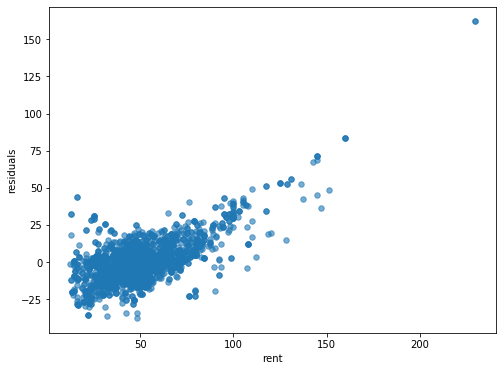

In [3]:
#x1=np.linspace(0,n-1,n)
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(y, y-results1.fittedvalues,s=30,alpha=0.6)
#plt.scatter(x1, results1.fittedvalues,s=30,c='r',label="OLS",alpha=0.6)

plt.xlabel("rent")
plt.ylabel("residuals")
plt.show()

In [4]:
X_new=X.iloc[:,[0,1,2,3,4,5,6,7,9,10,23,24,25,26,27,28,29,30,31,32,33]]
model2=sm.OLS(y,X_new)
results2=model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     113.3
Date:                Sun, 19 Jan 2020   Prob (F-statistic):               0.00
Time:                        20:33:25   Log-Likelihood:                -9924.9
No. Observations:                2412   AIC:                         1.989e+04
Df Residuals:                    2391   BIC:                         2.001e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                64.0093      3.73

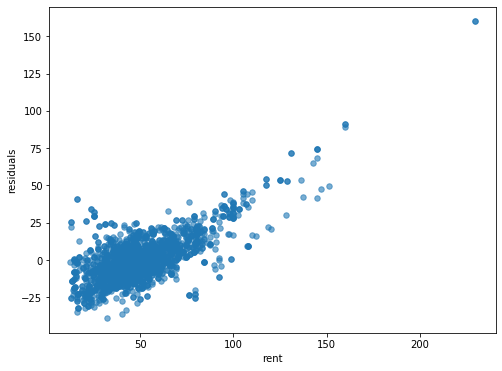

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(y, y-results2.fittedvalues,s=30,alpha=0.6)
#plt.scatter(x1, results2.fittedvalues,c='r',s=30,alpha=0.6,label="OLS")
plt.xlabel("rent")
plt.ylabel("residuals")
plt.show()

In [13]:
from sklearn.decomposition import PCA
contribution=np.cumsum(pca.explained_variance_ratio_)
contribution

array([0.87038379, 0.95772797, 0.98512829, 0.99126962, 0.99513924,
       0.99640605, 0.99725631, 0.99767553, 0.99804088, 0.99831262,
       0.99852947, 0.99873885, 0.99891927, 0.99908908, 0.99921924,
       0.99934061, 0.99944494, 0.9995367 , 0.99961326, 0.99967701,
       0.99973107, 0.99977827, 0.99981885, 0.99985187, 0.99987915])

In [7]:
pca = PCA(n_components=25)
pca.fit(x)
reduced_x=pca.fit_transform(x)
reduced_X=sm.add_constant(reduced_x)
y_norm=(y-y.mean())/y.std()
model3=sm.OLS(y_norm,reduced_X)
results3=model3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     96.39
Date:                Sun, 19 Jan 2020   Prob (F-statistic):               0.00
Time:                        20:33:27   Log-Likelihood:                -2580.0
No. Observations:                2412   AIC:                             5212.
Df Residuals:                    2386   BIC:                             5363.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.776e-17      0.014   1.92e-15      1.0

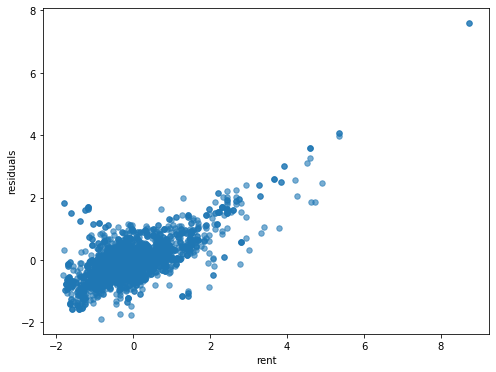

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(y_norm, y_norm-results3.fittedvalues,s=30,alpha=0.6)
#plt.scatter(x1, results3.fittedvalues,c='r',s=30,alpha=0.6,label="PCA")
plt.xlabel("rent")
plt.ylabel("residuals")
plt.show()

In [9]:
from sklearn.linear_model import Ridge,RidgeCV
#model = RidgeCV(alphas=[0.1, 1.0, 10.0])
model=RidgeCV(alphas=[0.1, 1.0, 10.0], cv=None, fit_intercept=True, scoring=None, normalize=True)
model.fit(x, y) 
print('系数矩阵:\n',model.coef_)
print('常数项:\n',model.intercept_)
print('线性回归模型:\n',model)
Ridge = model.predict(x)
print('最佳的alpha：',model.alpha_)

系数矩阵:
 [  0.65295585   1.42133582  -0.27017907   0.3327394   -0.32010317
   1.13304864  -3.20564524   0.22894793   0.49165097  -0.05601767
  -1.77942844  -0.02510732   0.75631971   0.           1.72819171
   1.14762897  -4.0933356   -0.89541315   1.35867782   4.71949116
  -0.62367334   4.08917394  -0.97321528   3.71221301 -16.90886551
 -15.97256338  -8.52707741 -19.72429377   8.06760457  -4.3694604
   6.100795    -3.50602648  -8.91173358 -13.88174787   0.45329034
  16.07122481  -2.76423252   4.24999487]
常数项:
 72.80048702626878
线性回归模型:
 RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=True, scoring=None, store_cv_values=False)
最佳的alpha： 0.1


No handles with labels found to put in legend.


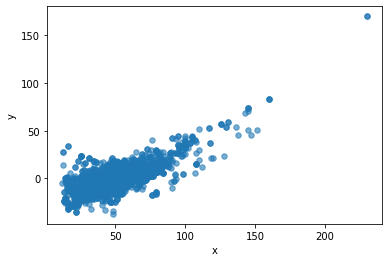

R_square： 0.5317783602290315
R_square_adjust： 0.524280500005139


In [10]:
#plt.scatter(x1, y,label="data",s=30,alpha=0.6)
plt.scatter(y, y-Ridge,label="Ridge",s=30,alpha=0.6)
ax.legend(loc='best')
plt.xlabel("x")
plt.ylabel("y")
plt.show()
RSS=np.sum((y-Ridge)**2)
TSS=np.sum((y-y_mean)**2)
R_square_Ridge=1-RSS/TSS
R_adj_Ridge=1-(n-1)*(1-R_square_Ridge)/(n-k-1)
print('R_square：',R_square_Ridge)
print('R_square_adjust：',R_adj_Ridge)

In [11]:
from sklearn.linear_model import Lasso,LassoCV,LassoLarsCV 
#model = LassoCV(alphas=[0.1, 1.0, 10.0])
model=LassoCV(alphas=[0.001,0.01,0.1, 1.0, 10.0], cv=None, fit_intercept=True, normalize=True)
model.fit(x, y)
print('系数矩阵:\n',model.coef_)
print('常数项:\n',model.intercept_)
print('线性回归模型:\n',model)
LASSO = model.predict(x)
print('最佳的alpha：',model.alpha_)

系数矩阵:
 [  3.43234209   2.95713575  -0.38697058   0.35936791   0.04742874
   1.28707517  -3.80732607   0.07417476   0.65461482  -0.13382892
  -0.90265809  -0.0606377    0.53723623   0.           1.75494549
   1.82396674  -3.46140088  -0.29957536   1.86078972   5.58397959
  -0.           3.94778752  -0.55009917   3.92834962  -6.42024879
  -9.92389892  -3.677739   -17.60259149  13.52395507   0.
  10.29394842  -0.          -5.77467739 -10.26219722   3.94992959
  22.44667481  -0.02659516   4.84017711]
常数项:
 57.55998639141707
线性回归模型:
 LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0], copy_X=True, cv=None, eps=0.001,
        fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
        normalize=True, positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)
最佳的alpha： 0.001


No handles with labels found to put in legend.


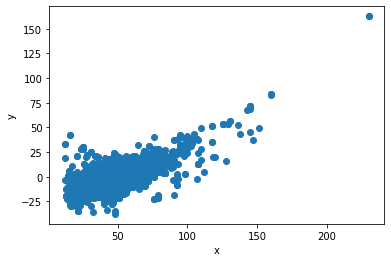

R_square： 0.5422701989387995
R_square_adjust： 0.5349403496171283


In [12]:
#plt.scatter(x1, y,label="data")
plt.scatter(y, y-LASSO,label="LASSO")
ax.legend(loc='best')
plt.xlabel("x")
plt.ylabel("y")
plt.show()
RSS_LASSO=np.sum((y-LASSO)**2)
TSS=np.sum((y-y_mean)**2)
R_square_LASSO=1-RSS_LASSO/TSS
R_adj_LASSO=1-(n-1)*(1-R_square_LASSO)/(n-k-1)
print('R_square：',R_square_LASSO)
print('R_square_adjust：',R_adj_LASSO)